In [9]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
import pandas as pd
import warnings  
warnings.filterwarnings('ignore')
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [10]:
df_stroke_data = pd.read_csv('playground-series-s3e2/train.csv')
df_stroke_data.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [11]:
df_original = pd.read_csv('healthcare-dataset-stroke-data.csv')


df_original.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [12]:
df_stroke_positive = df_original[df_original['stroke'] == 1]

df_stroke = pd.concat([df_stroke_data, df_stroke_positive], ignore_index=True)

In [13]:
df_stroke = df_stroke.drop_duplicates()

In [14]:
df_stroke.reset_index(drop=True, inplace=True)

In [15]:

df_stroke['bmi'] = df_stroke['bmi'].fillna(df_stroke['bmi'].mean())

In [17]:

df_stroke['stroke'].value_counts()

stroke
0    14672
1      881
Name: count, dtype: int64

=> The stroke column is the target column , the dataset solution is all about binary classification refering to stroke prediction.

In [18]:
df_stroke.shape

(15553, 12)

In [19]:
df_stroke.info


<bound method DataFrame.info of           id  gender   age  hypertension  heart_disease ever_married  \
0          0    Male  28.0             0              0          Yes   
1          1    Male  33.0             0              0          Yes   
2          2  Female  42.0             0              0          Yes   
3          3    Male  56.0             0              0          Yes   
4          4  Female  24.0             0              0           No   
...      ...     ...   ...           ...            ...          ...   
15548  17739    Male  57.0             0              0          Yes   
15549  49669  Female  14.0             0              0           No   
15550  27153  Female  75.0             0              0          Yes   
15551  34060    Male  71.0             1              0          Yes   
15552  43424  Female  78.0             0              0          Yes   

           work_type Residence_type  avg_glucose_level        bmi  \
0            Private          Urba

In [20]:
df_stroke.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [21]:
df_stroke.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [22]:

df_stroke.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15553.000000,15553.000000,15553.000000,15553.000000,15553.000000,15553.000000,15553.000000
mean,8123.205041,41.838933,0.053173,0.025976,89.736356,28.144497,0.056645
std,6371.529465,21.587035,0.224386,0.159068,27.011122,6.713834,0.231170
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3871.000000,26.000000,0.000000,0.000000,74.960000,23.500000,0.000000
50%,7748.000000,43.000000,0.000000,0.000000,85.260000,27.700000,0.000000
75%,11623.000000,57.000000,0.000000,0.000000,97.260000,32.000000,0.000000
max,72918.000000,82.000000,1.000000,1.000000,271.740000,80.100000,1.000000


In [23]:

initial_shape = df_stroke.shape

df_stroke = df_stroke.drop_duplicates()



df_stroke = df_stroke.dropna()


df_stroke.shape


(15553, 12)

In [24]:

df_stroke = df_stroke.drop(columns=['id', 'Residence_type'])


** Dropping the non informative column**

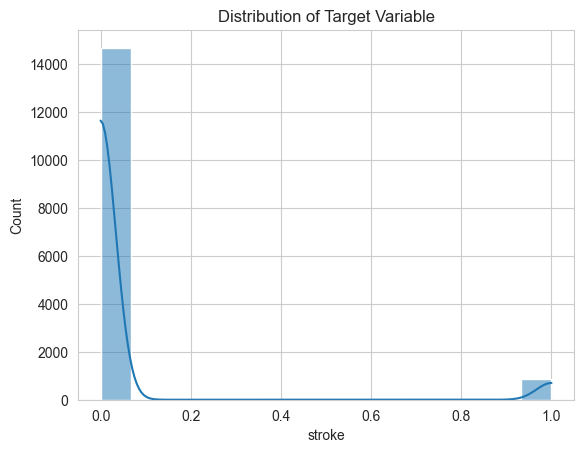

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_stroke['stroke'], kde=True)
plt.title("Distribution of Target Variable")
plt.show()


=>> The target value which is, just either 0 or 1, being binary classification in a histogram shows the stroke occurance has happened less accross the dataset.

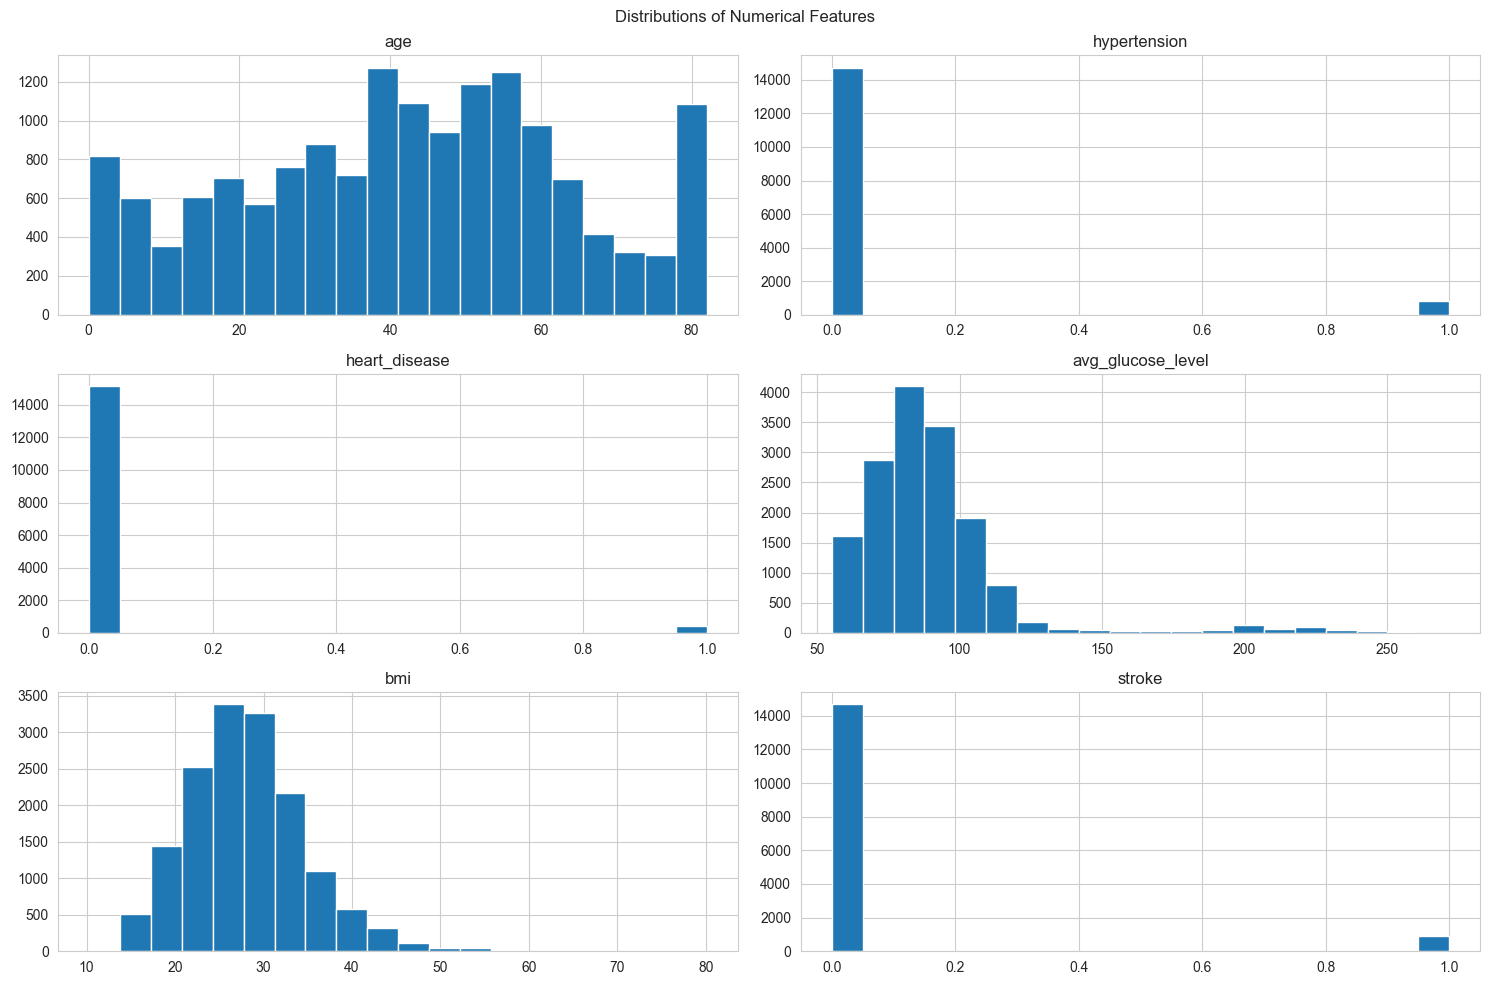

In [26]:
#Numerical features
df_stroke.select_dtypes(include='number').hist(figsize=(15, 10), bins=20)
plt.suptitle("Distributions of Numerical Features")
plt.tight_layout()
plt.show()


=>> Age histogram: Most people are of the age between 40 and 60 age across the dataset.
=>> Hypertension histogram: Most people do not have hypertention.
=>> Heart disease: Likewise, most people also do not have any sort of heart disease
=>> average glucose level histogram: Most people have around 100 average glucose level 
=> bmi histogram: most people have bmi score between 20 -30.

In [27]:
df_stroke.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke'],
      dtype='object')

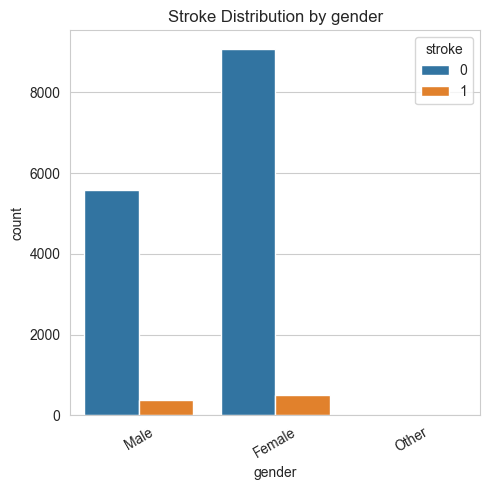

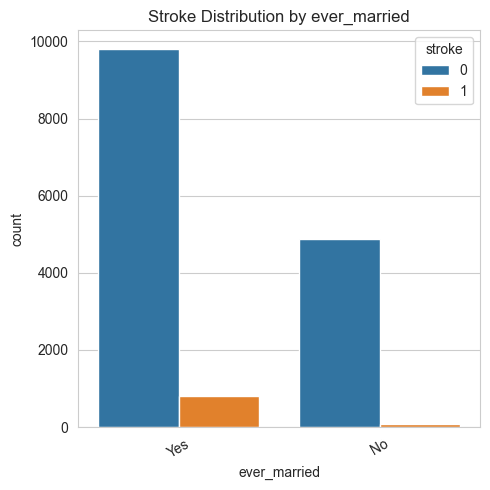

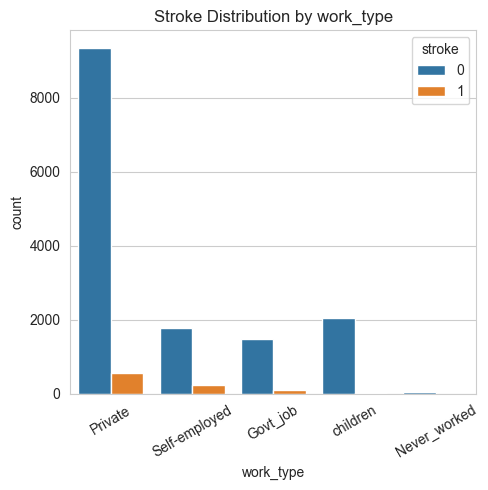

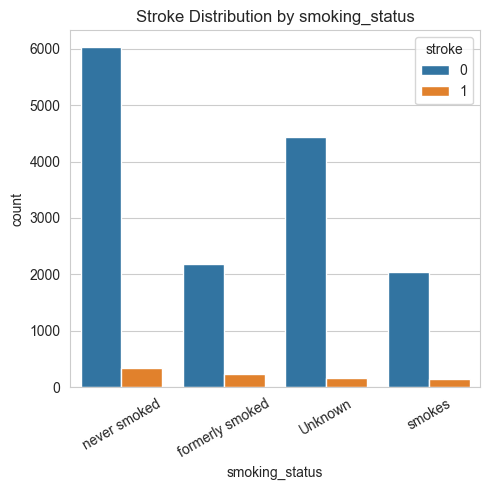

In [28]:
categorical_cols = ['gender', 'ever_married', 'work_type', 'smoking_status' ]

for col in categorical_cols:
    plt.figure(figsize=(5, 5))
    sns.countplot(data=df_stroke, x=col, hue='stroke')
    plt.title(f'Stroke Distribution by {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


=> from the above plot, the most obvious thing we can notice is about the class imbalance. the stroke prediction of someone having stroke is very less. 


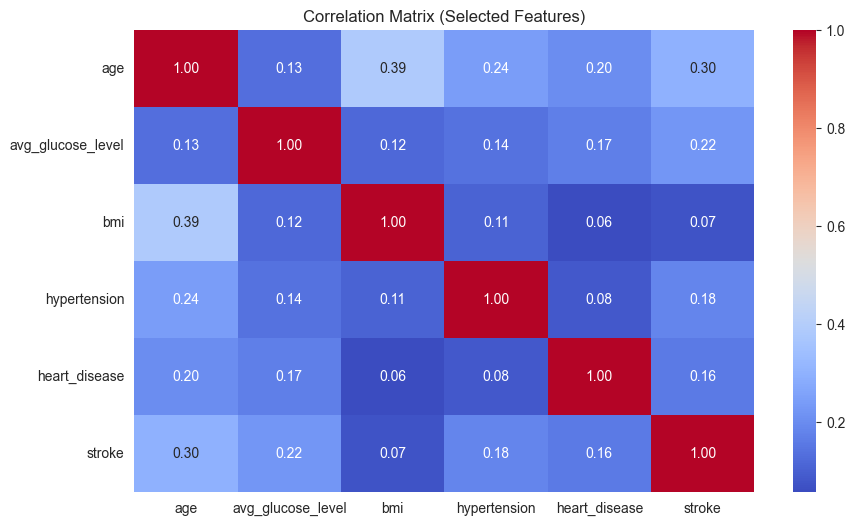

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt


selected_features = ['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke']


correlation_matrix = df_stroke[selected_features].corr()


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Selected Features)')
plt.show()


=> The Numerical features are selected for the correlation matrix. The strong positive correlation amoung all can be seen between BMI and age. However, many of the features have not that strong positive or negative correlation with the target column which clearly says the any solo features are not a solid indicator of the target column. 

** Feature Engineering**

In [30]:

df_stroke['smoking_status']


0           never smoked
1        formerly smoked
2                Unknown
3           never smoked
4           never smoked
              ...       
15548            Unknown
15549            Unknown
15550    formerly smoked
15551            Unknown
15552            Unknown
Name: smoking_status, Length: 15553, dtype: object

In [31]:
df_stroke['work_type'].unique()


array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [32]:
df_stroke['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [33]:
# Useful to detect categorical-like numerical features
df_stroke.nunique().sort_values()


hypertension            2
heart_disease           2
ever_married            2
stroke                  2
gender                  3
smoking_status          4
work_type               5
age                   106
bmi                   408
avg_glucose_level    3807
dtype: int64

** New columns are made and added to the data set so that the model can feel ease for the classification. For e.g: numerical features like bmi and age are used for making new columns of the categorial representation.**

In [34]:
def bmi_category(bmi):
    if pd.isnull(bmi):
        return 'Unknown'
    elif bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df_stroke['bmi_category'] = df_stroke['bmi'].apply(bmi_category)

=> Dividing age in category range

In [35]:

df_stroke['age_bin'] = pd.cut(df_stroke['age'], bins=[0, 40, 60, 100], labels=['young', 'middle', 'old'], right=False)



In [36]:
df_stroke['risk_score'] = (
    (df_stroke['age'] > 60).astype(int) +
    (df_stroke['avg_glucose_level'] > 150).astype(int) +
    df_stroke['hypertension'] +
    df_stroke['heart_disease']
)


In [37]:

df_stroke['risk_score'].corr(df_stroke['stroke'])


0.3831481131767037

In [38]:

df_stroke['obesity'] = df_stroke['avg_glucose_level'] * df_stroke['bmi'] / 1000
df_stroke['blood_heart']= df_stroke['hypertension']*df_stroke['heart_disease']
df_stroke['age_over_60'] = (df_stroke['age'] >= 60).astype(int)
df_stroke['is_married_senior'] = ((df_stroke['ever_married'] == 'Yes') & (df_stroke['age'] >= 60)).astype(int)
df_stroke['high_glucose'] = (df_stroke['avg_glucose_level'] > 140).astype(int)
df_stroke['stress_score'] = (
    df_stroke['age_over_60'] +
    df_stroke['high_glucose'] +
    (df_stroke['bmi'] >= 30).astype(int) +
    df_stroke['hypertension'] +
    df_stroke['heart_disease']
)

In [39]:

df_stroke['high_glucose'].corr(df_stroke['stroke'])


0.24746726966459945

In [40]:
df_stroke['stress_score'].corr(df_stroke['stroke'])

0.31454038375060617

In [ ]:
# Interaction Features:
df_stroke['glucose_x_bmi'] = df_stroke['avg_glucose_level'] * df_stroke['bmi']

df_stroke['hypertension_glucose_interaction'] = df_stroke['hypertension'] * df_stroke['avg_glucose_level']


=> with new feature, .corr is used to analyse its impact on target column

In [42]:
df_stroke['hypertension_glucose_interaction'].corr(df_stroke['stroke'])

0.21217778599399068

In [43]:
df_stroke['glucose_x_bmi'].corr(df_stroke['stroke'])

0.21469356725071748

=> THe following feature is referenced from an website article

In [44]:
df_stroke['inflammation_proxy'] = df_stroke['avg_glucose_level'] * df_stroke['bmi']


df_stroke['carotid_disease_proxy'] = df_stroke['avg_glucose_level'] * df_stroke['age_over_60']

=> Removing the feature colums to reduce redundancy

In [45]:
df_stroke = df_stroke.drop(columns=['smoking_binary', 'ever_married_binary', 'age_over_60', 'obesity', 'stress_score', 'glucose_x_bmi','hypertension_glucose_interaction'], errors='ignore')

In [46]:
df_stroke['inflammation_proxy'].corr(df_stroke['stroke'])

0.21469356725071748

In [47]:
df_stroke['carotid_disease_proxy'].corr(df_stroke['stroke'])

0.36712505009117863

**Lable encoder and one hot encoding is used for the categorial features. The lable encoder for the columns with less category and one hot for columns with more categories.**

In [48]:
le = LabelEncoder()#converting to numerical features

df_stroke['gender']= le.fit_transform(df_stroke['gender'])
df_stroke['ever_married']= le.fit_transform(df_stroke['ever_married'])

In [49]:
# One-Hot Encode
df_encoded = pd.get_dummies(df_stroke, columns=['work_type', 'smoking_status', 'bmi_category', 'age_bin'], drop_first=True)


df_encoded.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'stroke', 'risk_score', 'blood_heart',
       'is_married_senior', 'high_glucose', 'inflammation_proxy',
       'carotid_disease_proxy', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'bmi_category_Obese',
       'bmi_category_Overweight', 'bmi_category_Underweight', 'age_bin_middle',
       'age_bin_old'],
      dtype='object')

In [50]:

cols_to_scale = ['age', 'avg_glucose_level', 'bmi','blood_heart', 'inflammation_proxy', 'carotid_disease_proxy' ]
s = StandardScaler()


df_encoded[cols_to_scale] = s.fit_transform(df_encoded[cols_to_scale])


df_encoded[cols_to_scale].head()

,age,avg_glucose_level,bmi,blood_heart,inflammation_proxy,carotid_disease_proxy
0,-0.641097,-0.377870,0.440225,-0.066267,-0.065488,-0.470623
1,-0.409469,-0.418225,-0.632222,-0.066267,-0.598019,-0.470623
2,0.007462,0.491060,1.810574,-0.066267,1.426711,-0.470623
3,0.656020,-0.920627,0.097638,-0.066267,-0.603766,-0.470623
4,-0.826399,-0.606301,0.097638,-0.066267,-0.386265,-0.470623


**Handeling class imbalance**

In [51]:
df_encoded['stroke'].value_counts()

stroke
0    14672
1      881
Name: count, dtype: int64

In [52]:
df_encoded['stroke'].value_counts(normalize=True)

stroke
0    0.943355
1    0.056645
Name: proportion, dtype: float64

Which means ~5% of your data is stroke cases — very imbalanced.

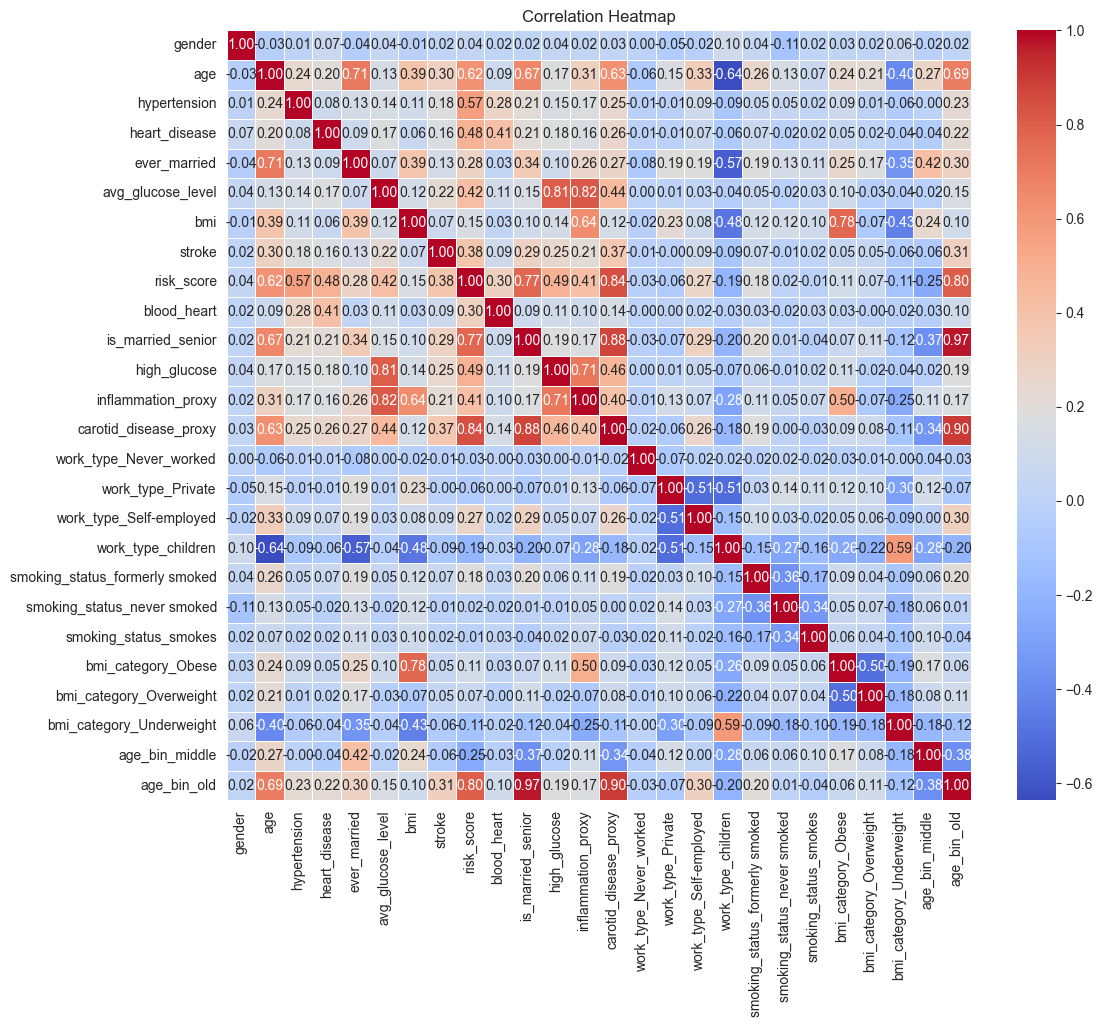

In [53]:

correlation_matrix = df_encoded.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [54]:

X = df_encoded.drop('stroke', axis=1)
y = df_encoded['stroke']

In [55]:
y.value_counts()

stroke
0    14672
1      881
Name: count, dtype: int64

<Axes: ylabel='count'>

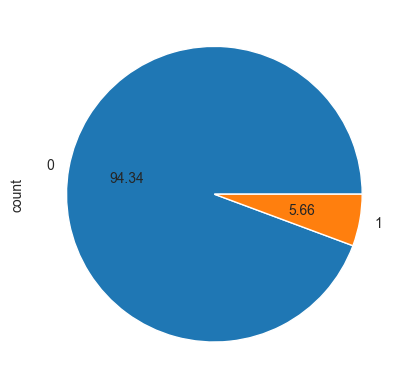

In [57]:
y.value_counts().plot.pie(autopct='%.2f')

=> this is a big class imbalance. The data set is dominated by the non stroke cases.

In [56]:
X.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'risk_score', 'blood_heart',
       'is_married_senior', 'high_glucose', 'inflammation_proxy',
       'carotid_disease_proxy', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'bmi_category_Obese',
       'bmi_category_Overweight', 'bmi_category_Underweight', 'age_bin_middle',
       'age_bin_old'],
      dtype='object')

**Splitting train and test to 80 and 20 a
Set	Percentage	Purpose
Train	80%	Model Training (also SMOTE Tomek applied here)
Test	20%	Final unseen evaluation

In [58]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)



In [59]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

==> Visualization of Feature importance

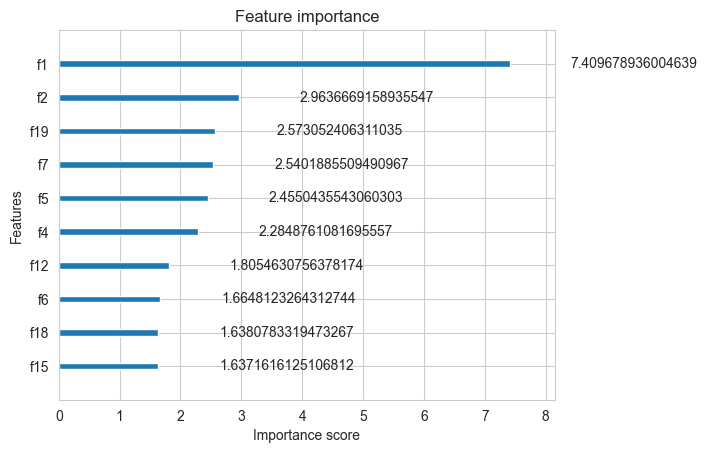

In [ ]:
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt


model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)


plot_importance(model, importance_type='gain', max_num_features=10)
plt.show()


=> Feature Slection

In [61]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

estimator = RandomForestClassifier(n_estimators=100, random_state=42)
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(X_train, y_train)



selected_columns = X.columns[selector.support_]
selected_columns


Index(['gender', 'age', 'avg_glucose_level', 'bmi', 'risk_score',
       'inflammation_proxy', 'carotid_disease_proxy', 'work_type_Private',
       'smoking_status_formerly smoked', 'smoking_status_never smoked'],
      dtype='object')

In [62]:
import pandas as pd


original_columns = X.columns  

# Then wrap scaled arrays back into DataFrames
X_train_df = pd.DataFrame(X_train, columns=original_columns)
X_test_df = pd.DataFrame(X_test, columns=original_columns)


X_train_selected = X_train_df[selected_columns]
X_test_selected = X_test_df[selected_columns]


In [63]:
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import pandas as pd
import numpy as np

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from imblearn.combine import SMOTETomek
import optuna
from optuna.samplers import TPESampler


==>> Resampeling using SMOTETomek

In [64]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(sampling_strategy=0.3, random_state=42)  # Increase from 0.3 to 0.4
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train_selected, y_train)

**CatBoost**

In [66]:
import optuna
from optuna.samplers import TPESampler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from catboost import CatBoostClassifier
import numpy as np

def objective_catboost(trial):
    params = {
    'iterations': trial.suggest_int("iterations", 100, 500),
    'depth': trial.suggest_int("depth", 3, 6),  # Shallower trees help generalize
    'learning_rate': trial.suggest_float("learning_rate", 0.01, 0.05),  # Slower learning
    'l2_leaf_reg': trial.suggest_float("l2_leaf_reg", 5, 20),  # Stronger regularization
    'border_count': trial.suggest_int("border_count", 32, 128),
    'scale_pos_weight': trial.suggest_float("scale_pos_weight", 5, 15),  # Boost minority class
    'random_seed': 42,
    'verbose': False,
    'loss_function': 'Logloss',
    'eval_metric': 'F1',
    'use_best_model': False,
}

    
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1s = []

    for train_idx, val_idx in skf.split(X_train_resampled, y_train_resampled):
        X_train_fold = X_train_resampled.iloc[train_idx]
        X_val_fold = X_train_resampled.iloc[val_idx]
        y_train_fold = y_train_resampled.iloc[train_idx]
        y_val_fold = y_train_resampled.iloc[val_idx]

        model = CatBoostClassifier(**params)
        model.fit(X_train_fold, y_train_fold)
        
        preds = model.predict(X_val_fold)
        f1 = f1_score(y_val_fold, preds, average='binary', pos_label=1)
        f1s.append(f1)

    return np.mean(f1s)

study_catboost = optuna.create_study(direction='maximize', sampler=TPESampler(seed=42))
study_catboost.optimize(objective_catboost, n_trials=50)

study_catboost.best_params


[I 2025-06-03 15:08:42,522] A new study created in memory with name: no-name-f8962187-5e15-4015-aecd-8fb1a5c9a452
[I 2025-06-03 15:08:49,091] Trial 0 finished with value: 0.6875625077784446 and parameters: {'iterations': 250, 'depth': 6, 'learning_rate': 0.03927975767245621, 'l2_leaf_reg': 13.979877262955549, 'border_count': 47, 'scale_pos_weight': 6.559945203362027}. Best is trial 0 with value: 0.6875625077784446.
[I 2025-06-03 15:08:50,689] Trial 1 finished with value: 0.5662248076146843 and parameters: {'iterations': 123, 'depth': 6, 'learning_rate': 0.034044600469728355, 'l2_leaf_reg': 15.621088666940683, 'border_count': 33, 'scale_pos_weight': 14.699098521619943}. Best is trial 0 with value: 0.6875625077784446.
[I 2025-06-03 15:08:59,360] Trial 2 finished with value: 0.586531772764179 and parameters: {'iterations': 433, 'depth': 3, 'learning_rate': 0.017272998688284025, 'l2_leaf_reg': 7.7510676478015075, 'border_count': 61, 'scale_pos_weight': 10.247564316322379}. Best is trial 0 

{'iterations': 479,
 'depth': 6,
 'learning_rate': 0.04484782653247039,
 'l2_leaf_reg': 5.03351421780212,
 'border_count': 108,
 'scale_pos_weight': 5.523216260500333}

In [68]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix


catboost_best = CatBoostClassifier(**study_catboost.best_params, random_seed=42, verbose=False)


catboost_best.fit(X_train_resampled, y_train_resampled)


y_train_pred = catboost_best.predict(X_train_selected)
y_test_pred = catboost_best.predict(X_test_selected)
y_test_probs_cat = catboost_best.predict_proba(X_test_selected)[:, 1]
threshold = 0.45  
y_test_pred_cat_thresh = (y_test_probs_cat >= threshold).astype(int)


In [69]:
print("Training Accuracy (CatBoost):", accuracy_score(y_train, y_train_pred))
print("Classification Report (CatBoost) - Training Set:\n", classification_report(y_train, y_train_pred))

Training Accuracy (CatBoost): 0.8684295129400418
Classification Report (CatBoost) - Training Set:
               precision    recall  f1-score   support

           0       0.99      0.87      0.93     11737
           1       0.28      0.88      0.43       705

    accuracy                           0.87     12442
   macro avg       0.64      0.87      0.68     12442
weighted avg       0.95      0.87      0.90     12442



In [70]:
print("Testing Accuracy (CatBoost):", accuracy_score(y_test, y_test_pred))
print("F1 Score (CatBoost):", f1_score(y_test, y_test_pred))
print("Classification Report (CatBoost):\n", classification_report(y_test, y_test_pred))

confusion_matrix(y_test, y_test_pred)

Testing Accuracy (CatBoost): 0.8489231758277082
F1 Score (CatBoost): 0.3561643835616438
Classification Report (CatBoost):
               precision    recall  f1-score   support

           0       0.98      0.86      0.91      2935
           1       0.23      0.74      0.36       176

    accuracy                           0.85      3111
   macro avg       0.61      0.80      0.64      3111
weighted avg       0.94      0.85      0.88      3111



array([[2511,  424],
       [  46,  130]], dtype=int64)

In [71]:
print("Threshold:0.45 Testing Accuracy (RandomForest):", accuracy_score(y_test, y_test_pred_cat_thresh))
print("F1 Score (RandomForest):", f1_score(y_test, y_test_pred_cat_thresh))
print("Classification Report (RandomForest):\n", classification_report(y_test, y_test_pred_cat_thresh))

confusion_matrix(y_test, y_test_pred_cat_thresh)

Threshold:0.45 Testing Accuracy (RandomForest): 0.8280295724847316
F1 Score (RandomForest): 0.33374844333748444
Classification Report (RandomForest):
               precision    recall  f1-score   support

           0       0.98      0.83      0.90      2935
           1       0.21      0.76      0.33       176

    accuracy                           0.83      3111
   macro avg       0.60      0.80      0.62      3111
weighted avg       0.94      0.83      0.87      3111



array([[2442,  493],
       [  42,  134]], dtype=int64)

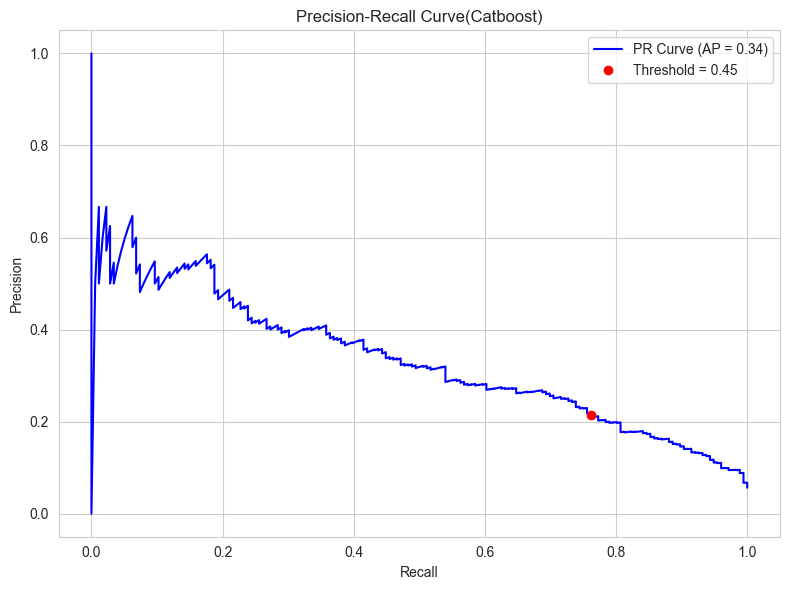

In [72]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score


precision, recall, thresholds = precision_recall_curve(y_test, y_test_probs_cat)
average_precision = average_precision_score(y_test, y_test_probs_cat)


plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AP = {average_precision:.2f})', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve(Catboost)')
plt.grid(True)


threshold_diff = abs(thresholds - 0.45)
closest_index = threshold_diff.argmin()
plt.plot(recall[closest_index], precision[closest_index], 'ro', label='Threshold = 0.45')

plt.legend()
plt.tight_layout()
plt.show()


**Random Forest**

In [73]:
def objective_rf(trial):
    params = {
        'n_estimators': trial.suggest_int("n_estimators", 50, 300),
        'max_depth': trial.suggest_int("max_depth", 5, 30),
        'min_samples_split': trial.suggest_int("min_samples_split", 2, 10),
        'min_samples_leaf': trial.suggest_int("min_samples_leaf", 1, 10),
        'max_features': trial.suggest_categorical("max_features", ['sqrt', 'log2']),
        'class_weight': 'balanced',
        'random_state': 42
    }

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1s = []

    for train_idx, val_idx in skf.split(X_train_resampled, y_train_resampled):
        X_train_fold, X_val_fold = X_train_resampled.iloc[train_idx], X_train_resampled.iloc[val_idx]
        y_train_fold, y_val_fold = y_train_resampled.iloc[train_idx], y_train_resampled.iloc[val_idx]

        model = RandomForestClassifier(**params)
        model.fit(X_train_fold, y_train_fold)
        preds = model.predict(X_val_fold)
        f1 = f1_score(y_val_fold, preds, average='binary', pos_label=1)
        f1s.append(f1)

    return np.mean(f1s)

study_rf = optuna.create_study(direction='maximize', sampler=TPESampler(seed=42))
study_rf.optimize(objective_rf, n_trials=30)

print("Best RF Parameters:", study_rf.best_params)


[I 2025-06-03 15:18:12,803] A new study created in memory with name: no-name-3d28b77b-ac48-4293-9897-a7fb361db556
[I 2025-06-03 15:18:23,532] Trial 0 finished with value: 0.7889409852764235 and parameters: {'n_estimators': 144, 'max_depth': 29, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7889409852764235.
[I 2025-06-03 15:18:28,210] Trial 1 finished with value: 0.7759531450342708 and parameters: {'n_estimators': 64, 'max_depth': 27, 'min_samples_split': 7, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 0 with value: 0.7889409852764235.
[I 2025-06-03 15:18:45,388] Trial 2 finished with value: 0.7713586392960666 and parameters: {'n_estimators': 258, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 0 with value: 0.7889409852764235.
[I 2025-06-03 15:18:56,065] Trial 3 finished with value: 0.7825172480021082 and parameters: {'n_estimators': 158, 'max_depth': 12, 'mi

Best RF Parameters: {'n_estimators': 209, 'max_depth': 25, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2'}


In [74]:
rf_best = RandomForestClassifier(**study_rf.best_params)
rf_best.fit(X_train_resampled, y_train_resampled)

y_train_pred_rf = rf_best.predict(X_train_selected)
y_test_pred_rf = rf_best.predict(X_test_selected)
y_test_probs_rf = rf_best.predict_proba(X_test_selected)[:, 1]

threshold = 0.3  
y_test_pred_rf_thresh = (y_test_probs_rf >= threshold).astype(int)


In [75]:
print("Training Accuracy (RandomForest):", accuracy_score(y_train, y_train_pred_rf))
print("Classification Report (XGBoost) - Training Set:\n", classification_report(y_train, y_train_pred))

Training Accuracy (RandomForest): 0.9917215881691046
Classification Report (XGBoost) - Training Set:
               precision    recall  f1-score   support

           0       0.99      0.87      0.93     11737
           1       0.28      0.88      0.43       705

    accuracy                           0.87     12442
   macro avg       0.64      0.87      0.68     12442
weighted avg       0.95      0.87      0.90     12442



In [76]:

print("Testing Accuracy (RandomForest):", accuracy_score(y_test, y_test_pred_rf))
print("F1 Score (RandomForest):", f1_score(y_test, y_test_pred_rf))
print("Classification Report (RandomForest):\n", classification_report(y_test, y_test_pred_rf))

confusion_matrix(y_test, y_test_pred_rf)



Testing Accuracy (RandomForest): 0.9234972677595629
F1 Score (RandomForest): 0.398989898989899
Classification Report (RandomForest):
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      2935
           1       0.36      0.45      0.40       176

    accuracy                           0.92      3111
   macro avg       0.66      0.70      0.68      3111
weighted avg       0.93      0.92      0.93      3111



array([[2794,  141],
       [  97,   79]], dtype=int64)

In [77]:
print("Threshold optimised Testing Accuracy (RandomForest):", accuracy_score(y_test, y_test_pred_rf_thresh))
print("F1 Score (RandomForest):", f1_score(y_test, y_test_pred_rf_thresh))
print("Classification Report (RandomForest):\n", classification_report(y_test, y_test_pred_rf_thresh))

confusion_matrix(y_test, y_test_pred_rf_thresh)

Threshold optimised Testing Accuracy (RandomForest): 0.8807457409193186
F1 Score (RandomForest): 0.3806343906510851
Classification Report (RandomForest):
               precision    recall  f1-score   support

           0       0.98      0.89      0.93      2935
           1       0.27      0.65      0.38       176

    accuracy                           0.88      3111
   macro avg       0.62      0.77      0.66      3111
weighted avg       0.94      0.88      0.90      3111



array([[2626,  309],
       [  62,  114]], dtype=int64)

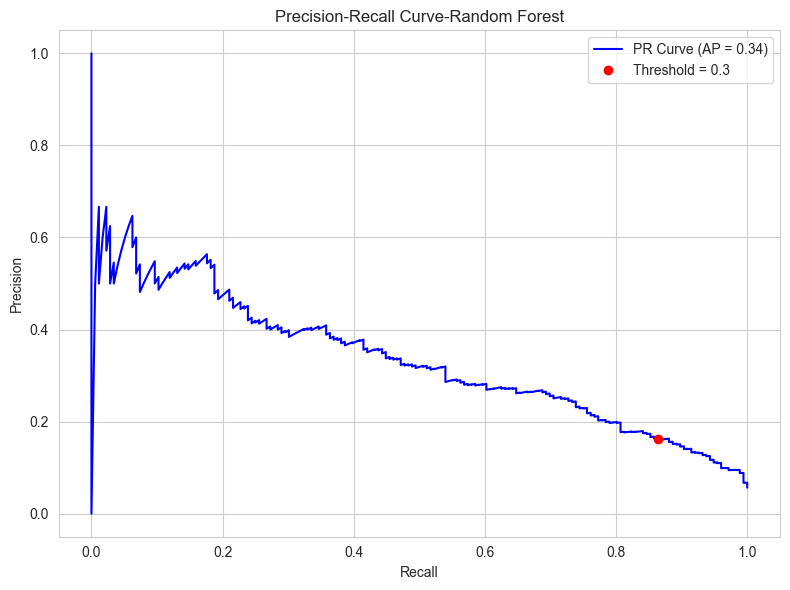

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score


precision, recall, thresholds = precision_recall_curve(y_test, y_test_probs_cat)
average_precision = average_precision_score(y_test, y_test_probs_cat)


plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AP = {average_precision:.2f})', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve-Random Forest')
plt.grid(True)


threshold_diff = abs(thresholds - 0.3)
closest_index = threshold_diff.argmin()
plt.plot(recall[closest_index], precision[closest_index], 'ro', label='Threshold = 0.3')

plt.legend()
plt.tight_layout()
plt.show()


**Removed Light GBM**

**Stacking Approach**

In [79]:


param_grid_catboost = {
    'scale_pos_weight': [10, 15, 20], 
    'depth': [3],  
    'learning_rate': [0.03, 0.01],  
    'l2_leaf_reg': [10],  
    'iterations': [75,100]  
}
param_grid_xgboost = {
    'scale_pos_weight': [10, 15, 20],  
    'max_depth': [3,4],  
    'learning_rate': [0.03, 0.05, 0.1],  
    'lambda': [4]  
}



skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) 

base_learners = [
    ('catboost', RandomizedSearchCV(
        CatBoostClassifier(verbose=0, random_state=42), param_distributions=param_grid_catboost, n_iter=10, cv=skf, scoring='f1')),
    ('xgboost', RandomizedSearchCV(
        XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        param_distributions=param_grid_xgboost, n_iter=10, cv=skf, scoring='f1'))
]
meta_learner = LogisticRegression(
    class_weight={0: 1, 1: 10},   
    penalty='l2',
    solver='liblinear',
    C=0.01,
    random_state=42
)


stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    n_jobs=-1,
    passthrough=False  
)



In [80]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import precision_recall_curve
from imblearn.over_sampling import SMOTE

calibrated_model = CalibratedClassifierCV(estimator=stacking_model, method='sigmoid', cv=skf, n_jobs=1)


In [81]:
calibrated_model.fit(X_train_resampled, y_train_resampled)

CalibratedClassifierCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                       estimator=StackingClassifier(estimators=[('catboost',
                                                                 RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                                                                                    estimator=<catboost.core.CatBoostClassifier object at 0x000001836DC45580>,
                                                                                    param_distributions={'depth': [3],
                                                                                                         'iterations': [75,
                                                                                                                        100],
                                                                                                         'l2_leaf_...
                                                                                                            monotone_constraints=None,
                                                                                                            multi_strategy=None,
                                                                                                            n_estimators=None,
                                                                                                            n_jobs=None,
                                                                                                            num_parallel_tree=None, ...),
                                                                                    param_distributions={'lambda': [4],
                                                                                                         'learning_rate': [0.03,
                                                                                                                           0.05,
                                                                                                                           0.1],
                                                                                                         'max_depth': [3,
                                                                                                                       4],
                                                                                                         'scale_pos_weight': [10,
                                                                                                                              15,
                                                                                                                              20]},
                                                                                    scoring='f1'))],
                                                    final_estimator=LogisticRegression(C=0.01,
                                                                                       class_weight={0: 1,
                                                                                                     1: 10},
                                                                                       random_state=42,
                                                                                       solver='liblinear'),
                                                    n_jobs=-1),
                       n_jobs=1)

In [82]:
import lime
import lime.lime_tabular
import numpy as np


X_train_array = X_train_selected.values
X_test_array = X_test_selected.values


explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_array,
    feature_names=X_train_selected.columns.tolist(),
    class_names=['Class 0', 'Class 1'],
    mode='classification'
)


i = 5
exp = explainer.explain_instance(
    data_row=X_test_array[i],
    predict_fn=calibrated_model.predict_proba
)


exp.show_in_notebook(show_table=True)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve


train_probs = calibrated_model.predict(X_train_selected)



train_acc = accuracy_score(y_train, train_probs)
print(train_acc)
print("\nClassification Report (Training):")
print(classification_report(y_train, train_probs))
print("Confusion Matrix (Training):\n", confusion_matrix(y_train, train_probs))


0.8921395274071693

Classification Report (Training):
              precision    recall  f1-score   support

           0       0.98      0.90      0.94     11737
           1       0.30      0.69      0.42       705

    accuracy                           0.89     12442
   macro avg       0.64      0.80      0.68     12442
weighted avg       0.94      0.89      0.91     12442

Confusion Matrix (Training):
 [[10614  1123]
 [  219   486]]


In [ ]:

y_pred_proba = calibrated_model.predict_proba(X_test_selected)[:, 1]

from sklearn.metrics import precision_recall_curve, f1_score

probs = calibrated_model.predict_proba(X_test_selected)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, probs)

best_threshold = 0.49 

for p, r, t in zip(precisions, recalls, thresholds):
    if r >= 0.7 and p >= 0.29:  # Prioritize recall more
        best_threshold = t
        break

print(f"Best threshold by PR Curve: {best_threshold}")


y_pred_best = (y_pred_proba >= best_threshold).astype(int)


val_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Testing accuracy: {val_accuracy:.2f}")
print("\nClassification Report (with Best Threshold):")
print(classification_report(y_test, y_pred_best))
print("F1 Score (Best Threshold):", f1_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

Best threshold by PR Curve: 0.49
Testing accuracy: 0.89

Classification Report (with Best Threshold):
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      2935
           1       0.29      0.70      0.41       176

    accuracy                           0.89      3111
   macro avg       0.63      0.80      0.67      3111
weighted avg       0.94      0.89      0.91      3111

F1 Score (Best Threshold): 0.40931780366056575
Confusion Matrix:
 [[2633  302]
 [  53  123]]


**References**
* Soltanzadeh, P., Feizi-Derakhshi, M.R. and Hashemzadeh, M. (2023) ‘Addressing the class-imbalance and class-overlap problems by a metaheuristic-based under-sampling approach’, Pattern Recognition, 143, p. 109721. doi:10.1016/j.patcog.2023.109721. 
* Widodo, S., Brawijaya, H. and Samudi, S. (2022) ‘Stratified k-fold cross validation optimization on machine learning for prediction’, Sinkron, 7(4), pp. 2407–2414. doi:10.33395/sinkron.v7i4.11792. 
* Jia Yao (2024) ‘Risk prediction model of recidivism based on stacking algorithm’, Membrane Technology, pp. 30–45. doi:10.52710/mt.81. 
* Silva Filho, T. et al. (2023) ‘Classifier calibration: A survey on how to assess and improve predicted class probabilities’, Machine Learning, 112(9), pp. 3211–3260. doi:10.1007/s10994-023-06336-7. 
* Lipton, Z.C., Elkan, C. and Naryanaswamy, B. (2014) ‘Optimal thresholding of classifiers to maximize F1 measure’, Lecture Notes in Computer Science, pp. 225–239. doi:10.1007/978-3-662-44851-9_15.  